In [1]:
import pickle

In [2]:
all_documents = pickle.load( open( "all_documents.pkl", "rb" ) )

In [3]:
all_documents.keys()

dict_keys(['essays/week2_Summary on Chapter 2 of Data Wrangling in Python.docx', 'essays/week1_summary.docx', 'essays/week2_Data601-Reading Assignment_2.docx', 'essays/week1_Data Wrangling Chap 2.docx', 'essays/week1_summary-50 years of data science.docx', 'essays/week1_Assignment1.docx', 'essays/week1_A Very Short History Of Data Science.docx', 'essays/week1_380.txt', 'essays/week2_Week 2 Reading Summary.docx', 'essays/week1_ Summary.docx', 'essays/week1_Data 601- Summary of The History of Data Science .docx', 'essays/week1_50 years of data science v2.pdf', 'essays/week1_1.txt', 'essays/week1_a History of Data Science.docx', 'essays/week2_Summary Week 2.docx', 'essays/week2 summary .docx', 'essays/week2_Data Wrangling with Python page 17 to 40.docx', 'essays/week2_Lists and Dictionaries Summary.docx', 'essays/Week2_summary.docx', 'essays/week1_assignment 1 Summary.pdf', 'essays/week1_a Very Short History Of Data Science_1.docx', 'essays/week1_50 Years Data Science Summary.docx', 'essa

Rather than consider the words per document, lets look at all of them

In [4]:
all_the_words=""
for file_path,content in all_documents.items():
    all_the_words+=content
    all_the_words+=" "

In [5]:
all_the_words[0:40]

'Summary on Chapter 2 of Data Wrangling i'

In [6]:
all_the_words=all_the_words.lower()

In [7]:
all_the_words[0:40]

'summary on chapter 2 of data wrangling i'

In [8]:
list_of_words=all_the_words.split(" ")

In [9]:
len(list_of_words)

7137

In [10]:
len(set(list_of_words))

1857

https://stackoverflow.com/questions/4371231/removing-punctuation-from-python-list-items

In [11]:
import string
list_of_words = [''.join(ch for ch in st if ch in string.ascii_lowercase) for st in list_of_words]

an expanded version 

In [ ]:
list_of_words_without_punctuation=[]
for this_string in list_of_words:
    new_list_of_char=[]
    for this_char in this_string:
        if (this_char in string.ascii_lowercase):
            new_list_of_char.append(this_char)
    new_string=''.join(new_list_of_char)
    list_of_words_without_punctuation.append(new_string)

In [12]:
len(set(list_of_words))

1523

https://stackoverflow.com/questions/3845423/remove-empty-strings-from-a-list-of-strings

In [13]:
list_of_words = list(filter(None, list_of_words))

In [14]:
len(list_of_words)

6954

In [15]:
len(set(list_of_words))

1522

In [16]:
max(set(list_of_words), key=list_of_words.count)

'the'

https://stackoverflow.com/questions/10099602/how-to-get-the-10-most-frequent-strings-in-a-list-in-python

In [17]:
from collections import Counter

In [18]:
Counter(list_of_words).most_common(10)

[('the', 374),
 ('data', 287),
 ('of', 243),
 ('and', 237),
 ('to', 188),
 ('a', 163),
 ('science', 139),
 ('in', 139),
 ('are', 94),
 ('is', 91)]

https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

In [19]:
dict_of_count=Counter(list_of_words)
import operator
sorted_tuples = sorted(dict_of_count.items(), key=operator.itemgetter(1),reverse=True)

https://stackoverflow.com/questions/646644/how-to-get-last-items-of-a-list-in-python

Alternatively, we could have told sort to reverse the list

In [20]:
sorted_tuples[-10:]

[('is', 91),
 ('are', 94),
 ('science', 139),
 ('in', 139),
 ('a', 163),
 ('to', 188),
 ('and', 237),
 ('of', 243),
 ('data', 287),
 ('the', 374)]

Need to remove the stop words

In [21]:
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

In [22]:
filtered_word_list = [] 
for w in list_of_words: 
    if w not in en_stops: 
        filtered_word_list.append(w) 

In [23]:
len(filtered_word_list)

4051

In [24]:
len(set(filtered_word_list))

1417

In [25]:
Counter(filtered_word_list).most_common(10)

[('data', 287),
 ('science', 139),
 ('python', 60),
 ('statistics', 46),
 ('lists', 41),
 ('methods', 32),
 ('dictionaries', 31),
 ('chapter', 30),
 ('also', 27),
 ('field', 26)]

When I see a list of numbers, I seek a visualization of the data.

First we need to convert the dictionary to a list of values.

In [28]:
list_of_counts=[]
for word,count in dict(Counter(filtered_word_list)).items():
    list_of_counts.append(count)

In [26]:
import matplotlib.pylab as plt

Let's see what a histogram looks like

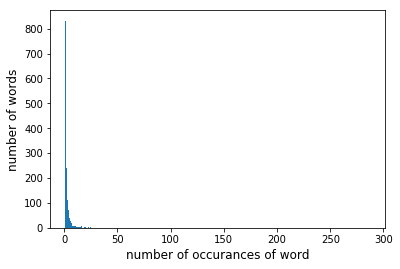

In [33]:
plt.hist(list_of_counts,bins=300)
plt.xlabel('number of occurances of word',fontsize=12)
plt.ylabel('number of words',fontsize=12)
plt.show()

There's a lot of rare words and a small number of words which appear often.

To get a better view, use the log of the y-axis.

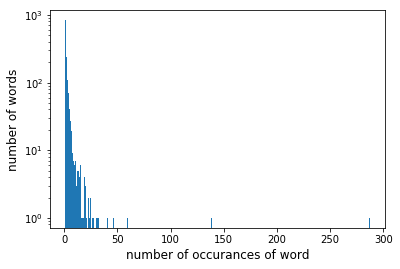

In [34]:
plt.hist(list_of_counts,bins=300)
plt.yscale('log', nonposy='clip')
plt.xlabel('number of occurances of word',fontsize=12)
plt.ylabel('number of words',fontsize=12)
plt.show()

The semilogy histogram shows slightly more, but the few words that are frequent still skew the view.

Log for both y-axis and x-axis:

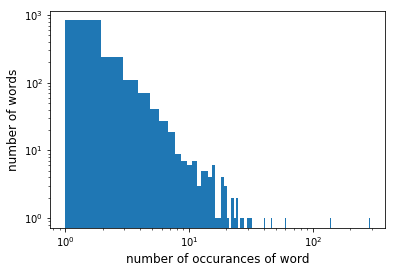

In [36]:
plt.hist(list_of_counts,bins=300)
plt.yscale('log', nonposy='clip')
plt.xscale('log', nonposx='clip')
plt.xlabel('number of occurances of word',fontsize=12)
plt.ylabel('number of words',fontsize=12)
plt.show()

A straight line on a [log-log](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot) axis is $$y=ax^k$$

https://en.wikipedia.org/wiki/Power_law

Well known feature of https://en.wikipedia.org/wiki/Zipf%27s_law

"Zipfian nature of word frequency distributions causes data sparseness problems." [source](http://sslmit.unibo.it/~baroni/publications/hsk_39_dist_rev2.pdf)

## So what?

The relevance is that we've stumbled into a verification that the text data really is text. If there were 10,000 documents, we wouldn't be able to inspect each document. Verifying that Zipf's law is applicable builds evidence that the documents are what we assume them to be.